In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


#### First we find the column which are not normally distributed

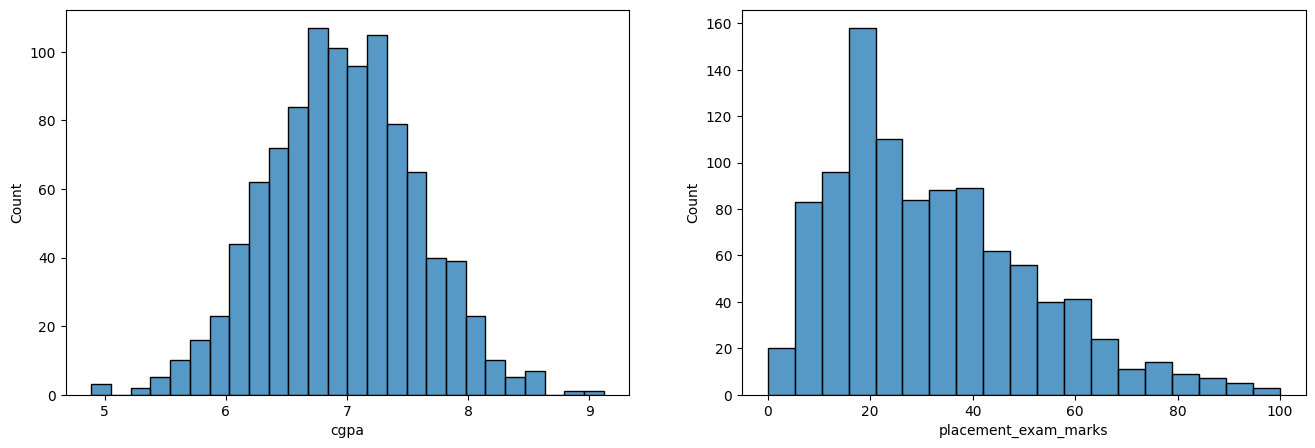

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

#### Placement_exam_marks is right skewed

In [5]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [6]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

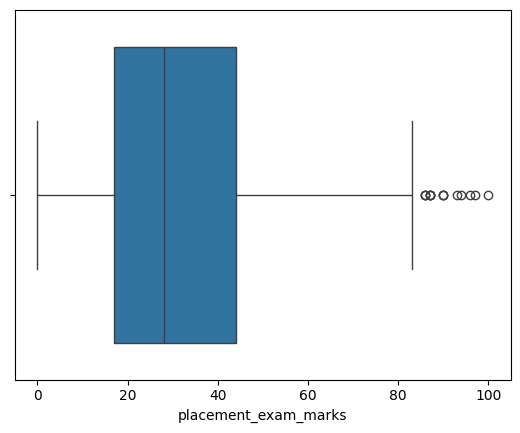

In [8]:
sns.boxplot(x=df['placement_exam_marks'], orient='h')
plt.show()

##### The points outside the whiskers are the outliers

#### Find the IQR

In [9]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [10]:
percentile25

np.float64(17.0)

In [11]:
percentile75

np.float64(44.0)

In [12]:
IQR= percentile75-percentile25

In [13]:
IQR

np.float64(27.0)

In [14]:
upperlimit= percentile75 + 1.5* IQR
lowerlimit= percentile25 - 1.5* IQR

In [15]:
upperlimit

np.float64(84.5)

In [16]:
lowerlimit

np.float64(-23.5)

In [17]:
#### Find the outliers ie,  valaues that cross the whisker, ie limits

In [18]:
df[df['placement_exam_marks'] >upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [19]:
df[df['placement_exam_marks'] < lowerlimit]

,cgpa,placement_exam_marks,placed


#### Trimming

In [20]:
new_df=df[df['placement_exam_marks'] <upperlimit]

In [21]:
new_df.shape

(985, 3)

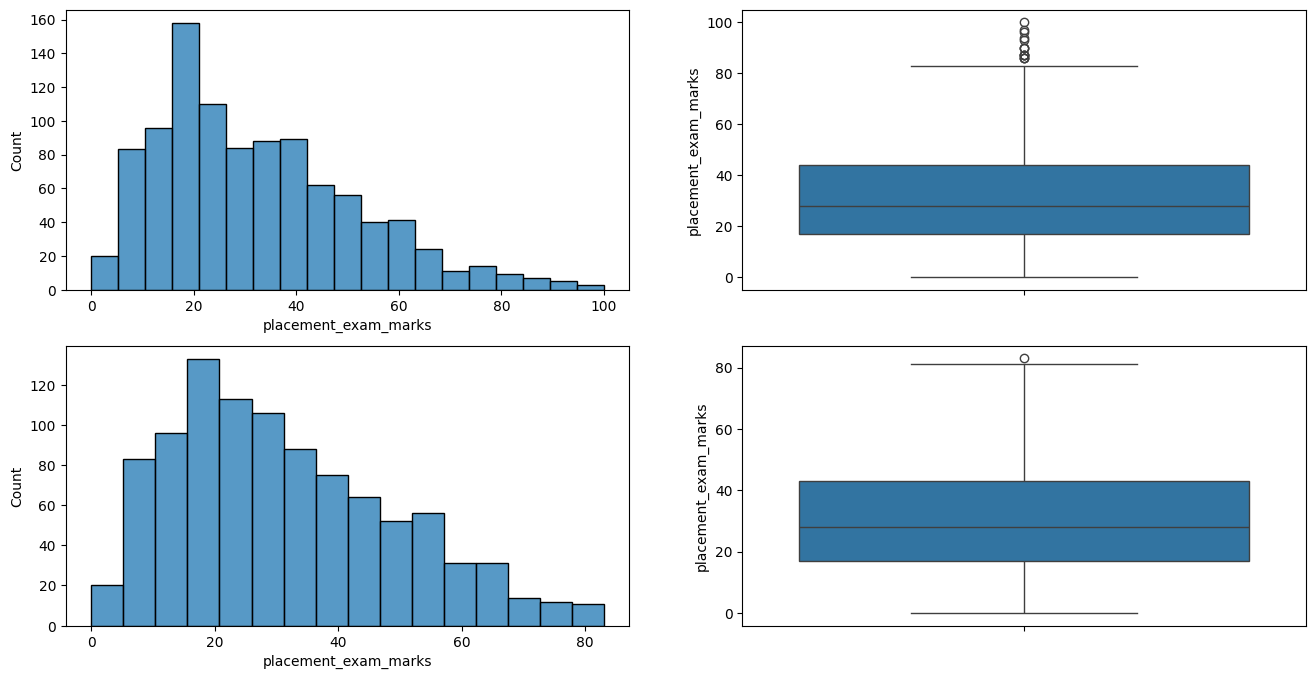

In [22]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

#### Capping

In [24]:
new_df_cap= df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upperlimit,
    upperlimit,
    np.where(
        new_df_cap['placement_exam_marks'] < lowerlimit,
        lowerlimit,
        new_df_cap['placement_exam_marks']
    )
)

In [28]:
new_df_cap.shape


(1000, 3)

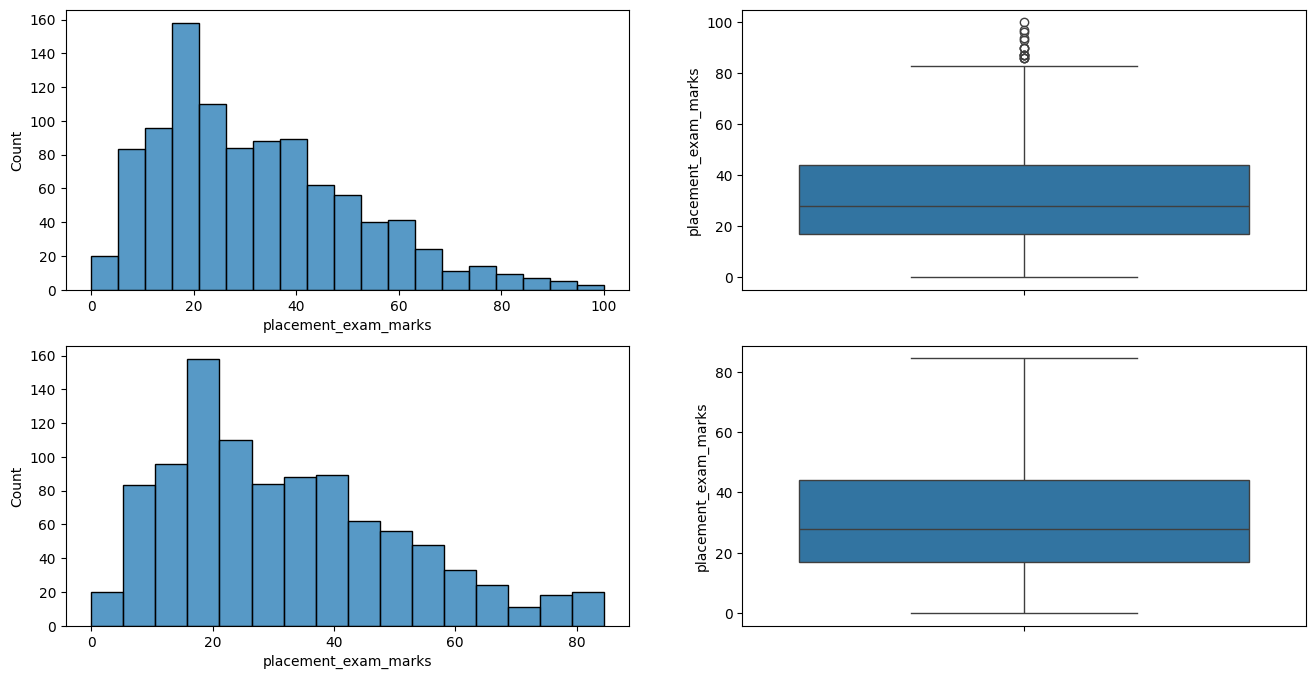

In [30]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()